In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [2]:
class KNN:
    def __init__(self,X_train,y_train,K):
        self.X_train=X_train
        self.y_train=y_train
        self.K=K
        
    def predict(self,X):
        y_pred=np.array([])
        
        for each in X:
            #find euclidean distance for each element
            eucl_dist=np.sum((each-self.X_train)**2,axis=1)
            y_eucl_dist=np.concatenate((self.y_train.reshape(self.y_train.shape[0],1),
                                 eucl_dist.reshape(eucl_dist.shape[0],1)),axis=1)
            y_eucl_dist=y_eucl_dist[y_eucl_dist[:,1].argsort()]
            #find K nearest elements
            K_neighbours=y_eucl_dist[0:self.K]
            #predict is the most common of the elements
            y_pred = np.append(y_pred,stats.mode(K_neighbours[:,0])[0][0])
            
        return y_pred

In [3]:
iris = datasets.load_iris()

y = iris.target
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length", "Sepal Width"])
iris_target = pd.DataFrame(data = y, columns = ["target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)

X = iris.data[:, :2]

In [4]:
#training and testing set size
train_size=int(0.75*iris_df.shape[0])
test_size=int(0.25*iris_df.shape[0])

print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

#Getting features from dataset
Data=iris_df.sample(frac=1)
X=Data.iloc[:,[0, 1]].values
y=Data.iloc[:,2].values

#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

Training set size : 112
Testing set size : 37


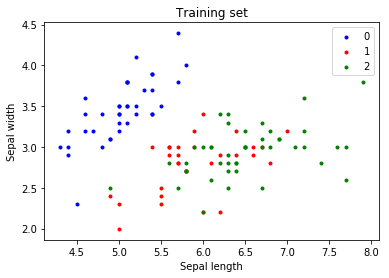

In [5]:
#visualize the training set 
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue','red','green'))(i), label = j,marker='.')
    
plt.title('Training set')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

plt.show()

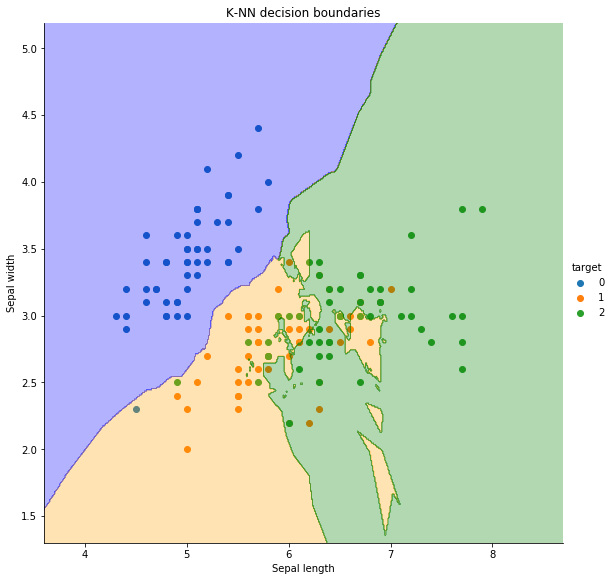

In [6]:
#init KNN
knn=KNN(X_train,y_train,6)

X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))
g = sns.FacetGrid(iris_df, hue="target", height=8).map(plt.scatter, "Sepal Length","Sepal Width",).add_legend()

z = knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

#plot decision boundaries
g.ax.contourf(X1, X2, z,
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange','green')))
plt.title('K-NN decision boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Pros and Cons of K-Nearest Neighbors

# Pros:

    1)Has no assumptions about data
    
    2)Versatile — useful for classification or regression
    
    3)Pretty intuitive and simple
    
# Cons:

    1)Slow algorithm - because the algorithm stores all of the training data
    
    2)Curse of Dimensionality
    
    3)Needs homogeneous features
    
    4)Choose optimal number of neighbors
    
    5)Outlier sensitivity
    
    6)Imbalanced data causes problems
    
    7)High memory requirement